

**chatGPT prompt**

Solving the Boston Housing Problem using Scikit-Learn and CRISP-DM

Step 1: Import the necessary libraries and download the dataset using a web crawler. Use the URL https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv to fetch the dataset. Convert the CSV content to a pandas DataFrame and print a summary of the dataset.

Step 2: Prepare X, Y using Train-Test Split

Split the dataset into training and testing sets using train_test_split function.

Step 3: Build Model using Lasso

Create a Lasso regression model and train it on the training data.

Step 4: Evaluate Model by R2 Score and MSE

Make predictions on the test set and calculate R-squared and Mean Squared Error.

Step 5: Predict Y_test Value

Print the predicted Y_test values obtained from the Lasso model.


# Step 1: Load Data from web


In [2]:
# Step 1: Import necessary libraries and fetch the dataset using a web crawler
import pandas as pd
import requests
from io import StringIO

# Define the URL to fetch the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Fetch the CSV content from the URL
response = requests.get(url)
data_content = response.content.decode('utf-8')

# Convert CSV content to a pandas DataFrame
boston_df = pd.read_csv(StringIO(data_content))

# Print a summary of the dataset
print(boston_df.head())
print(boston_df.info())
print(boston_df.describe())

# Rest of the CRISP-DM steps...




      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

# Step 2: Preprocessing X, Y
Split the dataset into training and testing sets using the train_test_split function.

In [ ]:
from sklearn.model_selection import train_test_split

# Step 2: Prepare X, Y using Train-Test Split
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with the rest of the CRISP-DM steps...
print(X.shape)
X.columns

Step 3: Build Model using Lasso

modify step 3 by using Lasso to build model

In [ ]:
from sklearn.linear_model import Lasso

# Step 3: Build Model using Lasso
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Continue with the rest of the CRISP-DM steps...


# Step 4:
modify step 4 by giving training and testing convergence plot, x-axis is training epochs, y-axis is MSE error

# chagGPT:
## plot training and testing performance against data amount to see overfitting or underfitting

Step 4: Evaluate Model with Different Numbers of Variables

In this step, you will evaluate the Lasso regression model's performance using different numbers of variables for feature selection. By iteratively selecting a subset of variables with non-zero coefficients, you will train Lasso models and assess their Mean Squared Error (MSE) on the testing dataset. Additionally, you will record the names of the selected variables for each model to gain insights into the most influential features.

Follow these sub-steps:

Import the necessary libraries, including NumPy, Matplotlib, and functions from Scikit-Learn (mean_squared_error, LassoCV).

If not already done, split the dataset into training and testing sets using the train_test_split function. Ensure you have X_train, X_test, y_train, and y_test.

Initialize empty lists train_mse_list and test_mse_list to store training and testing MSE values.

Initialize an empty list selected_variable_names to store the names of selected variables for each model.

Iterate over different numbers of variables (e.g., from 1 to the total number of features in the dataset). For each iteration:

Select a subset of the training data X_subset with the first size variables.
Train a Lasso model with LassoCV to automatically determine the optimal alpha value for regularization based on cross-validation.
Use np.where to identify the indices of variables with non-zero coefficients in the Lasso model.
Select the corresponding columns from X_subset to create X_subset_selected.
Train a new Lasso model on the selected features using the optimal alpha value.
Predict the target variable for both training and testing datasets using the selected features.
Calculate the MSE for both the training and testing predictions.
After iterating through different numbers of variables, loop over the recorded results:

Print the number of variables used in the model.
Print the names of the selected variables (joined as a string).
Print the testing MSE for that model.
Proceed with the remaining steps of the CRISP-DM process.

This approach will help you understand the impact of varying the number of variables on the Lasso model's performance and identify the key features contributing to the predictions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Import the necessary libraries and fetch the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Step 2: Prepare X, Y using Train-Test Split
X = data.drop(columns=["medv"])
y = data["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Evaluate Model and Plot Training vs. Testing Performance
train_mse_list = []
test_mse_list = []
selected_variable_names = []

data_sizes = np.arange(1, len(X_train.columns) + 1)

for size in data_sizes:
    # Select a subset of the training data
    X_subset = X_train.iloc[:, :size]
    y_subset = y_train

    # Train a new Lasso model with LassoCV for feature selection
    lasso_model_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
    lasso_model_cv.fit(X_subset, y_subset)

    # Select features with non-zero coefficients
    selected_features = np.where(lasso_model_cv.coef_ != 0)[0]
    X_subset_selected = X_subset.iloc[:, selected_features]
    selected_variable_names.append(X_subset_selected.columns)

    # Train a new Lasso model on the selected features
    lasso_model_subset = Lasso(alpha=lasso_model_cv.alpha_)
    lasso_model_subset.fit(X_subset_selected, y_subset)

    # Predict on the training and testing sets
    y_train_pred = lasso_model_subset.predict(X_subset_selected)
    X_test_selected = X_test.iloc[:, selected_features]
    y_test_pred = lasso_model_subset.predict(X_test_selected)

    # Calculate MSE for training and testing sets
    train_mse = mean_squared_error(y_subset, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Print MSE and selected variable names for each model
for i, num_variables in enumerate(data_sizes):
    print(f"Model with {num_variables} variable(s):")
    print("Selected Variables:", ", ".join(selected_variable_names[i]))
    print("Testing MSE:", test_mse_list[i])
    print()

# Continue with the rest of the CRISP-DM steps...



In [ ]:
data.columns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Import the necessary libraries and fetch the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Step 2: Prepare X, Y using Train-Test Split
X = data.drop(columns=["medv"])
y = data["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Evaluate Model with Different Numbers of Variables and Plot MSE
train_mse_list = []
test_mse_list = []
selected_variable_names = []
num_variables_list = []

data_sizes = np.arange(1, len(X_train.columns) + 1)

for size in data_sizes:
    # Select a subset of the training data
    X_subset = X_train.iloc[:, :size]
    y_subset = y_train

    # Train a new Lasso model with LassoCV for feature selection
    lasso_model_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
    lasso_model_cv.fit(X_subset, y_subset)

    # Select features with non-zero coefficients
    selected_features = np.where(lasso_model_cv.coef_ != 0)[0]
    X_subset_selected = X_subset.iloc[:, selected_features]
    selected_variable_names.append(X_subset_selected.columns)
    num_variables_list.append(size)

    # Train a new Lasso model on the selected features
    lasso_model_subset = Lasso(alpha=lasso_model_cv.alpha_)
    lasso_model_subset.fit(X_subset_selected, y_subset)

    # Predict on the training and testing sets
    y_train_pred = lasso_model_subset.predict(X_subset_selected)
    X_test_selected = X_test.iloc[:, selected_features]
    y_test_pred = lasso_model_subset.predict(X_test_selected)

    # Calculate MSE for training and testing sets
    train_mse = mean_squared_error(y_subset, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Print and plot MSE and selected variable names for each model
for i, num_variables in enumerate(num_variables_list):
    print(f"Model with {num_variables} variable(s):")
    print("Selected Variables:", ", ".join(selected_variable_names[i]))
    print("Testing MSE:", test_mse_list[i])
    print()

# Plot MSE against the number of variables
plt.figure(figsize=(10, 6))
plt.plot(num_variables_list, test_mse_list, marker='o')
plt.xlabel("Number of Variables")
plt.ylabel("Testing MSE")
plt.title("Testing MSE vs. Number of Variables")
plt.grid()
plt.show()

# Continue with the rest of the CRISP-DM steps...



In [ ]:


# Continue with the rest of the CRISP-DM steps...


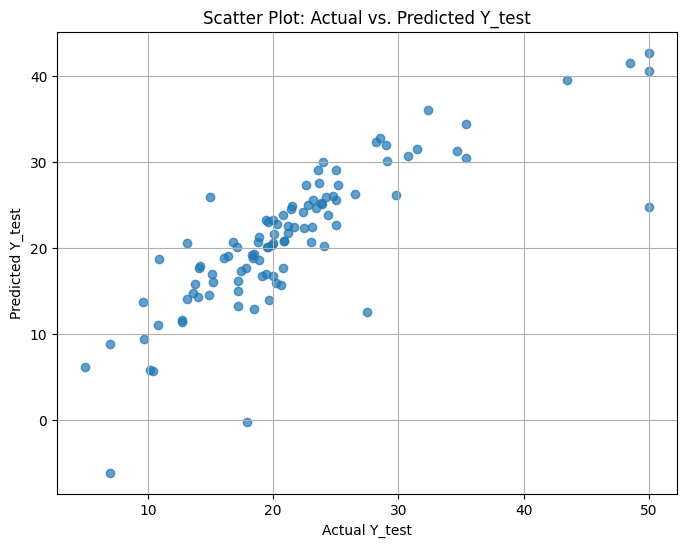

In [ ]:
# Step 5: Predict Y_test and Show Scatter Plot
y_test_pred = lasso_model_subset.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual Y_test")
plt.ylabel("Predicted Y_test")
plt.title("Scatter Plot: Actual vs. Predicted Y_test")
plt.grid()
plt.show()

# Continue with the rest of the CRISP-DM steps...


In [ ]:
X_test.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')